<a href="https://colab.research.google.com/github/bnarath/TF_Developer/blob/main/Neural_Network_Classification_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

## Types
- Binary (0 or 1 label)
- Multiclass (one to choose out of 1 to n labels, atleast one output should be present)
- Multi label (can choose 0 to n labels)

  ## Multiclass Classification
  n classes
  - Input Shape
    - Tablular Data: 
      - (#batch size, #features) or
      - (None, #features)
                    
    - Image: 
      - (#batch size, height, width, #color channels) or 
      - (None, height, width, #color channels)

    - 32 is a common batch size for images

  - Output Shape = (#classes)
  - Loss: categorical cross entropy

  ## Binary Classification
  2 classes
  - Input Shape
    - Tablular Data: 
      - (#batch size, #features) or
      - (None, #features)
                    
    - Image: 
      - (#batch size, height, width, #color channels) or 
      - (None, height, width, #color channels)

    - 32 is a common batch size for images

  - Output Shape = (1)
  - Loss: binary cross entropy


## Data

  - Tensorflow Playground (https://playground.tensorflow.org/)
  - from sklearn.datasets import (many datasets)

## Plot
  - scatter plot
    ```plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlGn)```

  - Contour plot
    ```
    def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions
    y_pred = model.predict(x_in)
   
    if len(y_pred[0]) > 1:
      print("doing multiclass classification")
      # We have to reshape our prediction to get them ready for plotting
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    else:
      print("doing binary classification")
      y_pred = np.round(y_pred).reshape(xx.shape)

    # plt.contourf(xx, yy)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return y_pred
    ```

  - Confusion matrix

    ```python

    from sklearn.metrics import confusion_matrix
    import itertools

    def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes 
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)
     
  ```

## Model


  ```python
    tf.random.set_seed(10)

    model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(10, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
        ]
    )

    model.compile(
        loss="binary_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )

    es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
    lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-1 * 10**(-epoch/20))

    history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=[lr, es])
  ```

  # Fashion mnist example

  ```
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Normalise
x_train = x_train/x_train.max()
x_test = x_test/x_train.max()

#visualize
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)


#Model
from scipy.optimize import optimize
tf.random.set_seed(10)

model_fmnist = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])


model_fmnist.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_fmnist.fit(x_train, tf.one_hot(y_train, depth=10), epochs=100, batch_size=10000, validation_data=(x_test, tf.one_hot(y_test, depth=10)), callbacks=[es]) #batch_size=32 by default


#Or

tf.random.set_seed(10)

model_fmnist = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])


model_fmnist.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_fmnist.fit(x_train, y_train, epochs=100, batch_size=10000, validation_data=(x_test, y_test), callbacks=[es]) #batch_size=32 by default


# To find out the best learning rate, start from a small lr, and gradually increase per epochs.
# If there is a sudden reduction in loss, consider lr slighly before that point

tf.random.set_seed(10)

model_fmnist_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax)
])


model_fmnist_norm.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=100)
norm_history = model_fmnist_norm.fit(x_train, y_train, epochs=100, batch_size=10000, validation_data=(x_test, y_test), callbacks=[es, lr]) #batch_size=32 by default


import matplotlib.pyplot as plt
lrs = 1e-4 * 10**(tf.range(100, dtype=tf.float32)/20)
plt.semilogx(lrs, norm_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")


  ```

Visualization 

```
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))

    target_image = images[i]

    pred_probs = model.predict(target_image)
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label==true_label:
      color="green"
    else:
      color="red"

    plt.xlabel("Pred: {} confidence = {:.2f}% (True: {})".format(pred_label,
                                                      tf.reduce_max(pred_probs)*100,
                                                      true_label
                                 ),
               color=color)

```

Model Inspection

```
  # Inspect models
  model_fmnist_norm.summary()

  #Extract list of layers
  model_fmnist_norm.layers

  #Extract a particular layer
  model_fmnist_norm.layers[0]

  #Get the patterns of a layer in our network
  weigths, biases = model_fmnist_norm.layers[1].get_weights()

  #Plot model
  from tensorflow.keras.utils import plot_model
  plot_model(model_fmnist_norm, show_shapes=True, show_dtype=True)

```






# Create data to view and fit

In [ ]:
from sklearn.datasets import make_circles
import pandas as pd

n_samples=1000
X, y = make_circles(n_samples=n_samples, 
             noise = 0.03,
             random_state=10)

circles_df = pd.DataFrame({"X": X[:,0], "y": X[:,1], "label": y})
circles_df

,X,y,label
0,-0.310314,-0.683169,1
1,0.654843,-0.408102,1
2,0.720671,0.421821,1
3,-0.544078,0.811637,0
4,-0.812086,-0.143518,1
...,...,...,...
995,-0.613536,-0.706016,0
996,0.750838,0.249544,1
997,0.821907,-0.055010,1
998,0.022105,0.952507,0


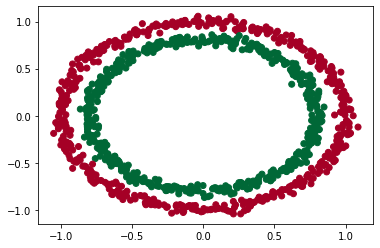

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlGn)

In [ ]:
X

array([[-0.31031434, -0.68316883],
       [ 0.65484283, -0.40810234],
       [ 0.72067081,  0.42182061],
       ...,
       [ 0.82190708, -0.05501004],
       [ 0.02210515,  0.95250698],
       [-1.04922246, -0.1882639 ]])

# Input and Output Shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0], y[0]

(array([-0.31031434, -0.68316883]), 1)

# Steps in model building

- Create or import a model
- Compile the model
- Fit the model
- Evaluate the model
- Tweak
- Evaluate...


In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics = ["accuracy"]
)

callbacks = tf.keras.callbacks.EarlyStopping('loss', patience=10)

model.fit(X, y, epochs=100, callbacks=callbacks)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6987 - accuracy: 0.5080
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4680
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.4620
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6951 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6947 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.4660
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4960
Epoch 11/

In [ ]:
import numpy as np
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions
    y_pred = model.predict(x_in)
   
    if len(y_pred[0]) > 1:
      print("doing multiclass classification")
      # We have to reshape our prediction to get them ready for plotting
      y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    else:
      print("doing binary classification")
      y_pred = np.round(y_pred).reshape(xx.shape)

    # plt.contourf(xx, yy)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return y_pred

313/313 [==============================] - 1s 3ms/step
doing binary classification


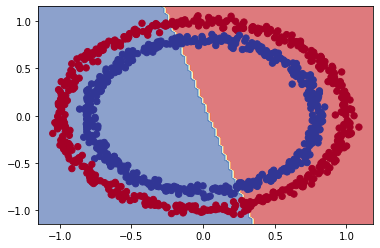

In [ ]:
y_pred = plot_decision_boundary(model, X, y)

# Check if the sam emodel can be used for a regression problem

In [ ]:
from IPython.core.interactiveshell import validate
from sklearn.model_selection import train_test_split
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5).reshape(-1, 1)
y_regression = np.arange(100, 1100, 5) #y=x+100


# Split our regression data into training and test sets
# X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression, y_regression, test_size=0.25, random_state=10)
X_reg_train, X_reg_test, y_reg_train, y_reg_test =X_regression[:150, :], X_regression[150:, :], y_regression[:150], y_regression[150:]

model_reg = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=(None, 1)),
        tf.keras.layers.Dense(1)
    ]
)

model_reg.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["mae"]
)


callbacks = tf.keras.callbacks.EarlyStopping('val_loss', patience=10)

model_reg.fit(X_reg_train, y_reg_train, epochs = 100, callbacks=callbacks,   validation_data=(X_reg_test, y_reg_test))

Epoch 1/100
5/5 [==============================] - 2s 102ms/step - loss: 315.4643 - mae: 315.4643 - val_loss: 356.5812 - val_mae: 356.5812
Epoch 2/100
5/5 [==============================] - 0s 37ms/step - loss: 262.8929 - mae: 262.8929 - val_loss: 102.9164 - val_mae: 102.9164
Epoch 3/100
5/5 [==============================] - 0s 22ms/step - loss: 263.8946 - mae: 263.8946 - val_loss: 52.9427 - val_mae: 52.9427
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 259.5308 - mae: 259.5308 - val_loss: 49.1010 - val_mae: 49.1010
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 256.8149 - mae: 256.8149 - val_loss: 113.5023 - val_mae: 113.5023
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 257.9108 - mae: 257.9108 - val_loss: 186.2141 - val_mae: 186.2141
Epoch 7/100
5/5 [==============================] - 0s 22ms/step - loss: 255.1557 - mae: 255.1557 - val_loss: 186.1861 - val_mae: 186.1861
Epoch 8/100
5/5 [====================

2/2 [==============================] - 0s 11ms/step


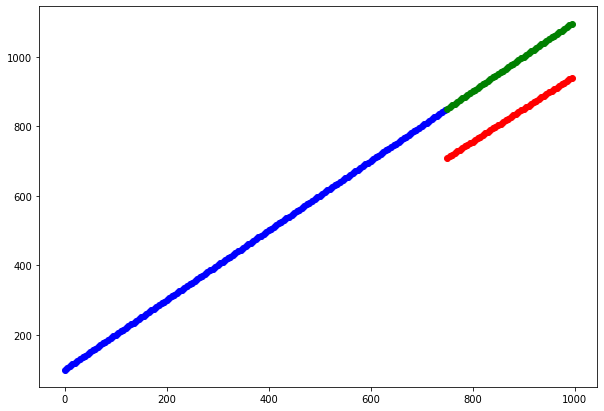

In [ ]:
y_pred_reg = model_reg.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c = "b", label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c = "g", label = "Test data ground truth")
plt.scatter(X_reg_test, y_pred_reg, c = "r", label = "Test data pred")

# Change classification model by introducing non linearity

In [ ]:
n_samples=1000
X, y = make_circles(n_samples=n_samples, 
             noise = 0.03,
             random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics = ["accuracy"]
)

callbacks = tf.keras.callbacks.EarlyStopping('val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=200, callbacks=callbacks, validation_data=[X_test, y_test])

Epoch 1/200
24/24 [==============================] - 2s 24ms/step - loss: 0.6924 - accuracy: 0.5027 - val_loss: 0.6956 - val_accuracy: 0.4520
Epoch 2/200
24/24 [==============================] - 0s 6ms/step - loss: 0.6880 - accuracy: 0.5067 - val_loss: 0.6946 - val_accuracy: 0.4720
Epoch 3/200
24/24 [==============================] - 0s 7ms/step - loss: 0.6850 - accuracy: 0.5147 - val_loss: 0.6912 - val_accuracy: 0.5240
Epoch 4/200
24/24 [==============================] - 0s 10ms/step - loss: 0.6821 - accuracy: 0.5333 - val_loss: 0.6891 - val_accuracy: 0.5240
Epoch 5/200
24/24 [==============================] - 0s 13ms/step - loss: 0.6798 - accuracy: 0.5480 - val_loss: 0.6859 - val_accuracy: 0.5360
Epoch 6/200
24/24 [==============================] - 0s 11ms/step - loss: 0.6773 - accuracy: 0.5467 - val_loss: 0.6829 - val_accuracy: 0.5560
Epoch 7/200
24/24 [==============================] - 0s 12ms/step - loss: 0.6747 - accuracy: 0.5680 - val_loss: 0.6811 - val_accuracy: 0.5440
Epoch 8/

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 1.0000


[0.05299651622772217, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification


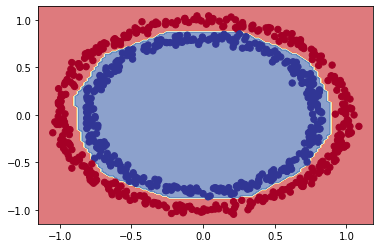

In [ ]:
y_pred = plot_decision_boundary(model, X_train, y_train)

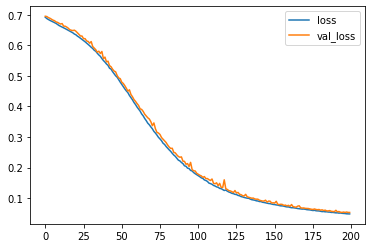

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

# Exploring non linearity

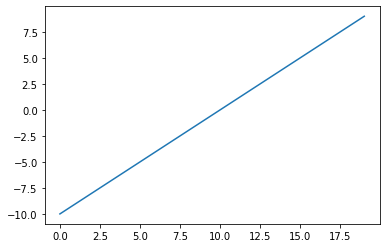

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.range(-10, 10, dtype=tf.float32)
plt.plot(A) #plt.plot(tf.range(0, 20, dtype=tf.float32), A)

In [ ]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

tf.keras.activations.sigmoid(A), sigmoid(A)

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
        2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
        8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
        9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
       dtype=float32)>, <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
        2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
        1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
        8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
        9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
       dtype=float32)>)

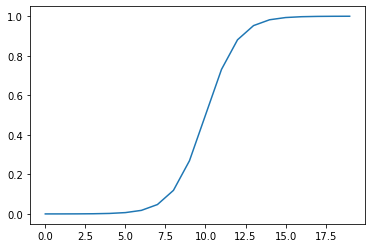

In [ ]:
plt.plot(sigmoid(A))

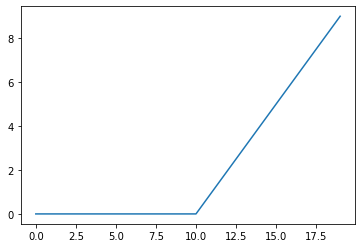

In [ ]:

# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

plt.plot(relu(A))

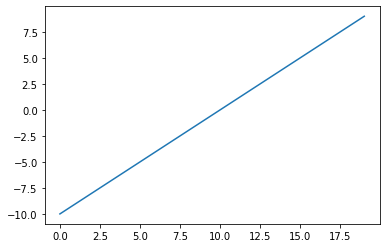

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A));

In [ ]:

# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Plot train and test data with decision boundary

2.9.2
Epoch 1/100
24/24 [==============================] - 1s 19ms/step - loss: 0.6898 - accuracy: 0.5080 - val_loss: 0.6951 - val_accuracy: 0.4760
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5307 - val_loss: 0.6899 - val_accuracy: 0.5160
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.5613 - val_loss: 0.6804 - val_accuracy: 0.5520
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.6387 - val_loss: 0.6655 - val_accuracy: 0.6280
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6547 - val_loss: 0.6545 - val_accuracy: 0.6960
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.7453 - val_loss: 0.6434 - val_accuracy: 0.7640
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6254 - accuracy: 0.7427 - val_loss: 0.6291 - val_accuracy: 0.8760
Epoch 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

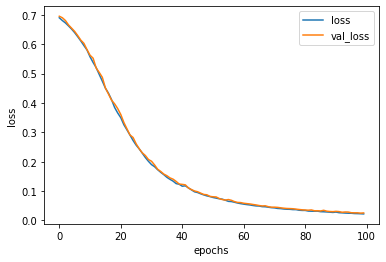

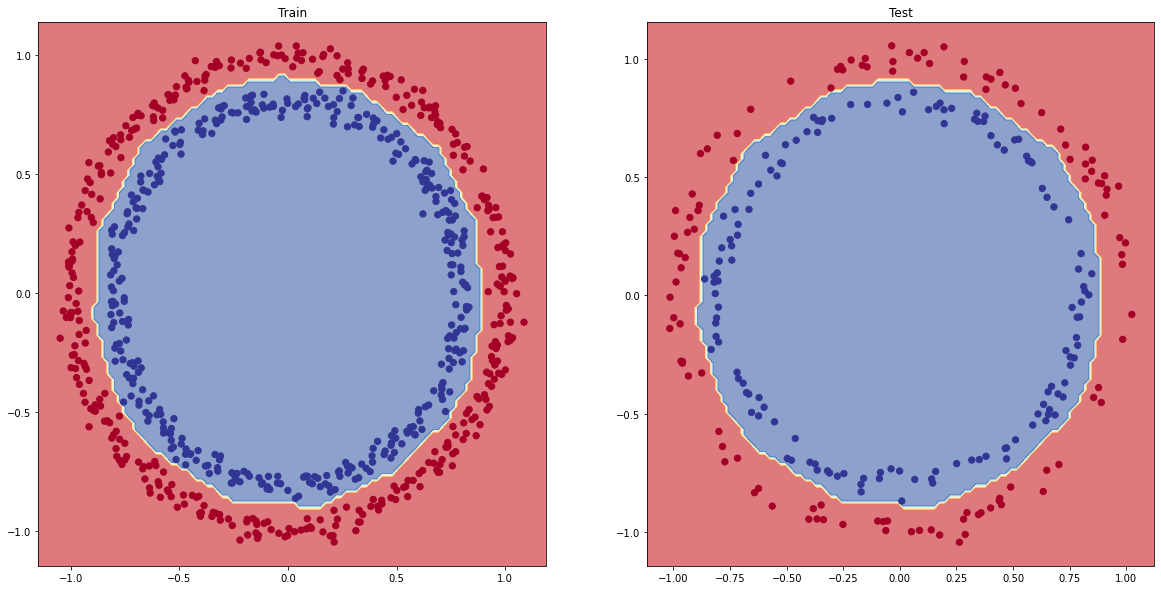

In [ ]:
# visualization
import matplotlib.pyplot as plt
import numpy as np


# Data

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.03, random_state=10)

# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10)


#Model build
import tensorflow as tf

print(tf.__version__)

tf.random.set_seed(10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#model fit
history = model.fit(X_train, y_train,
                    epochs = 100,
                    callbacks = [callbacks],
                    validation_data = [X_test, y_test])


#Visualize
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.xlabel("epochs")
plt.ylabel("loss")

#Evaluation
print(f"Evaluation Result {model.evaluate(X_test, y_test)}")
y_pred = model.predict(X_test)

#Visualize
#Visualize
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


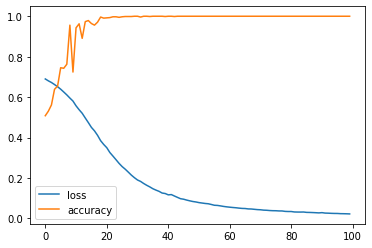

In [ ]:
pd.DataFrame(history.history)[['loss', 'accuracy']].plot()

# Finding the best learning rate using learning rate scheduler

In [ ]:
tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=[lr])

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 0.6939 - accuracy: 0.5013 - val_loss: 0.6953 - val_accuracy: 0.5040 - lr: 1.0000e-04
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5053 - val_loss: 0.6953 - val_accuracy: 0.5080 - lr: 1.1220e-04
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5027 - val_loss: 0.6953 - val_accuracy: 0.5080 - lr: 1.2589e-04
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5040 - val_loss: 0.6953 - val_accuracy: 0.4920 - lr: 1.4125e-04
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5053 - val_loss: 0.6952 - val_accuracy: 0.4920 - lr: 1.5849e-04
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5067 - val_loss: 0.6952 - val_accuracy: 0.4800 - lr: 1.7783e-04
Epoch 7/100
24/24 [==============================] 

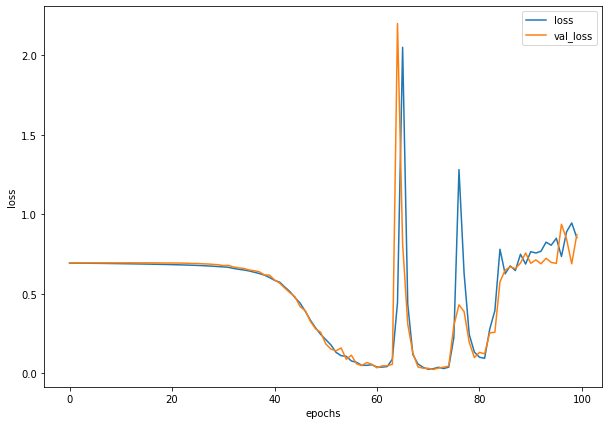

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize=(10, 7), xlabel="epochs", ylabel="loss")

Text(0.5, 1.0, 'Learning rate vs. Loss')

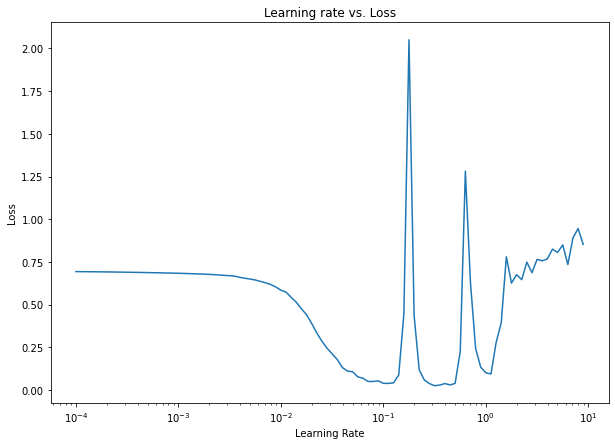

In [ ]:
#Plot lr vs loss
import matplotlib.pyplot as plt
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

## Use the best learning rate

In [ ]:
tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)


history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=[es])

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 0.6898 - accuracy: 0.5080 - val_loss: 0.6951 - val_accuracy: 0.4760
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5307 - val_loss: 0.6899 - val_accuracy: 0.5160
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.5613 - val_loss: 0.6804 - val_accuracy: 0.5520
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6622 - accuracy: 0.6387 - val_loss: 0.6655 - val_accuracy: 0.6280
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6547 - val_loss: 0.6545 - val_accuracy: 0.6960
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6393 - accuracy: 0.7453 - val_loss: 0.6434 - val_accuracy: 0.7640
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.7427 - val_loss: 0.6291 - val_accuracy: 0.8760
Epoch 8/100


In [ ]:

# Evaluate model 10 on the test dataset
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 1.0000


[0.025773558765649796, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


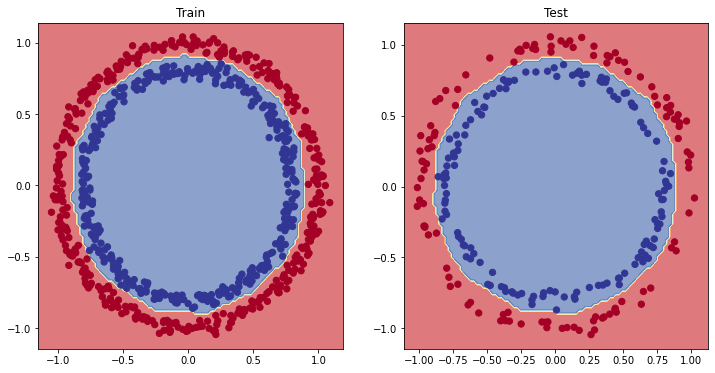

In [ ]:

# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
plt.show()

# More classification evaluation methods

- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix
- [Classification report (from scikit-learn)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 1.0000
Model loss on the test set: 0.025773558765649796
Model accuracy on the test set: 100.00%


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(X_test, y_test, model):
  y_pred = np.round(model.predict(X_test)).ravel()

  cm = confusion_matrix(y_test, y_pred)

  cm_norm = cm.astype("float")/cm.sum(axis=0)[:, np.newaxis]
  n_classes = cm.shape[0]

  figsize = (10, 10)
  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])


  ax.set(
      title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks = np.arange(n_classes),
      yticks = np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels
  )


  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(25)


  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, f"{cm[i, j]} ({cm_norm[i, j]*100}%)",
            horizontalalignment = "center",
            color = "white" if cm[i,j] > threshold else "black",
            size=15
    )
  return fig

8/8 [==============================] - 0s 2ms/step


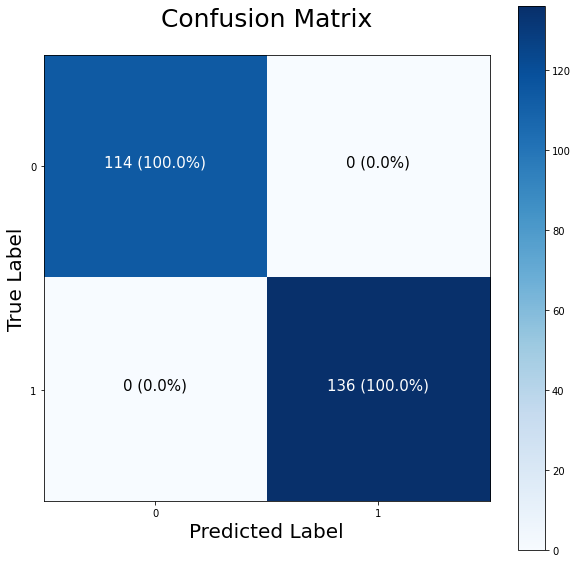

In [ ]:
fig = plot_confusion_matrix(X_test, y_test, model)

# Working with larger example

- To practice mutli-class classificaiton, we're going to build a neural network to classify images of different items of clothing.

- Data - fashion mnist

Label	Description
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

## Preparing the data

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_train[0].shape, y_train[0].shape

((28, 28), ())

In [ ]:
x_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

(<matplotlib.image.AxesImage at 0x7f979c76ce50>, 9)

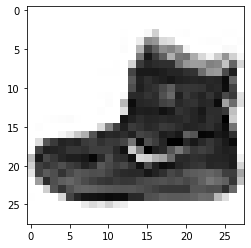

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.Greys), y_train[0]

In [ ]:

# Create a small list so we can index onto our training labels so they're human-readable 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

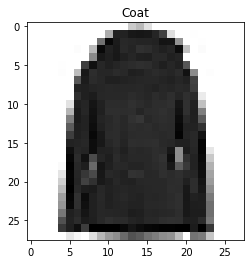

In [ ]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(x_train[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[y_train[index_of_choice]])

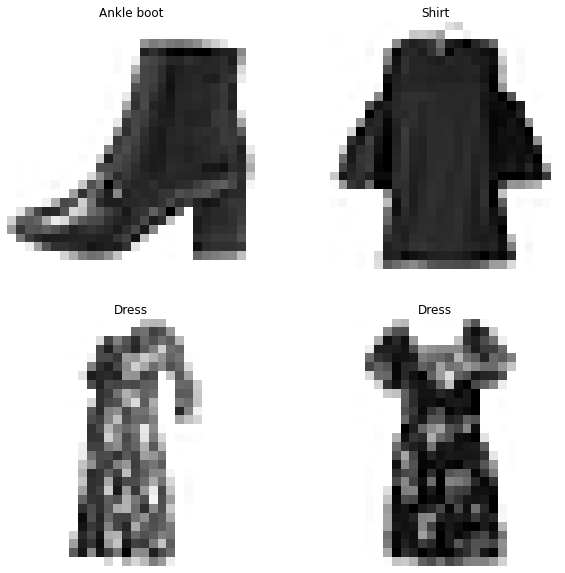

In [ ]:

# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)


## Build a multi class classification model

In [ ]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

(None, 784)

In [ ]:
tf.one_hot(y_train[:2], depth=10)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
tf.random.set_seed(10)

model_fmnist = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, "relu"),
    tf.keras.layers.Dense(4, "relu"),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])


model_fmnist.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
model_fmnist.fit(x_train, tf.one_hot(y_train, depth=10), epochs=10, validation_data=(x_test, tf.one_hot(y_test, depth=10)), callbacks=[es]) #batch_size=32 by default

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3159 - accuracy: 0.0997 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.1005 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0995 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0990 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.0985 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3040 - accuracy: 0.1001 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3040 - accuracy: 0.1005 - val_loss: 2.3035 - val_accuracy:

In [ ]:
model_fmnist.evaluate(x_test, tf.one_hot(y_test, depth=10))

313/313 [==============================] - 1s 2ms/step - loss: 2.3042 - accuracy: 0.1000


[2.3041954040527344, 0.10000000149011612]

In [ ]:
tf.random.set_seed(10)

model_fmnist = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax)
])


model_fmnist.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

# lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-1 * 10**(-epoch//5))
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
non_norm_history = model_fmnist.fit(x_train, y_train, epochs=10, batch_size=10000, validation_data=(x_test, y_test), callbacks=[es]) #batch_size=32 by default

Epoch 1/10
6/6 [==============================] - 1s 162ms/step - loss: 464.4533 - accuracy: 0.1819 - val_loss: 203.7166 - val_accuracy: 0.2474
Epoch 2/10
6/6 [==============================] - 1s 127ms/step - loss: 95.2630 - accuracy: 0.3235 - val_loss: 41.0605 - val_accuracy: 0.4017
Epoch 3/10
6/6 [==============================] - 1s 142ms/step - loss: 30.1952 - accuracy: 0.4921 - val_loss: 13.6066 - val_accuracy: 0.5410
Epoch 4/10
6/6 [==============================] - 1s 130ms/step - loss: 12.2283 - accuracy: 0.5782 - val_loss: 9.7795 - val_accuracy: 0.6022
Epoch 5/10
6/6 [==============================] - 1s 132ms/step - loss: 7.9711 - accuracy: 0.6166 - val_loss: 6.2775 - val_accuracy: 0.6468
Epoch 6/10
6/6 [==============================] - 1s 127ms/step - loss: 5.6187 - accuracy: 0.6560 - val_loss: 5.4222 - val_accuracy: 0.6576
Epoch 7/10
6/6 [==============================] - 1s 124ms/step - loss: 4.3408 - accuracy: 0.6710 - val_loss: 3.7978 - val_accuracy: 0.6685
Epoch 8/10


In [ ]:
model_fmnist.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.2379 - accuracy: 0.7106


[2.237877130508423, 0.7106000185012817]

In [ ]:

# Check the model summary
model_fmnist.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'loss')

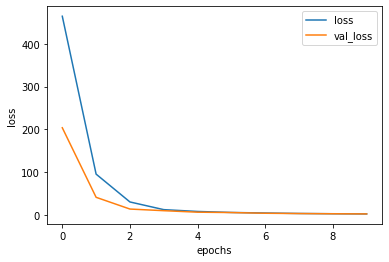

In [ ]:
pd.DataFrame(non_norm_history.history)[["loss", "val_loss"]].plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
x_train.min(), x_train.max()

(0, 255)

## Normalizing data

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
max_value=x_train.max()
x_train = x_train/max_value
x_test = x_test/max_value

In [ ]:
x_train.min(), x_train.max(), x_test.min(), x_test.max()

(0.0, 1.0, 0.0, 1.0)

In [ ]:
tf.random.set_seed(10)

model_fmnist_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax)
])


model_fmnist_norm.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

# lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-1 * 10**(-epoch//5))
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
norm_history = model_fmnist_norm.fit(x_train, y_train, epochs=10, batch_size=10000, validation_data=(x_test, y_test), callbacks=[es]) #batch_size=32 by default

Epoch 1/10
6/6 [==============================] - 1s 155ms/step - loss: 1.8995 - accuracy: 0.3108 - val_loss: 1.1905 - val_accuracy: 0.5364
Epoch 2/10
6/6 [==============================] - 1s 125ms/step - loss: 0.9535 - accuracy: 0.6471 - val_loss: 0.7883 - val_accuracy: 0.7046
Epoch 3/10
6/6 [==============================] - 1s 126ms/step - loss: 0.7115 - accuracy: 0.7418 - val_loss: 0.6664 - val_accuracy: 0.7569
Epoch 4/10
6/6 [==============================] - 1s 141ms/step - loss: 0.6142 - accuracy: 0.7750 - val_loss: 0.6003 - val_accuracy: 0.7753
Epoch 5/10
6/6 [==============================] - 1s 117ms/step - loss: 0.5590 - accuracy: 0.7983 - val_loss: 0.5671 - val_accuracy: 0.8022
Epoch 6/10
6/6 [==============================] - 1s 124ms/step - loss: 0.5193 - accuracy: 0.8178 - val_loss: 0.5280 - val_accuracy: 0.8179
Epoch 7/10
6/6 [==============================] - 1s 113ms/step - loss: 0.4824 - accuracy: 0.8309 - val_loss: 0.4880 - val_accuracy: 0.8305
Epoch 8/10
6/6 [====

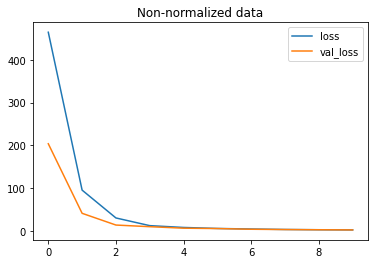

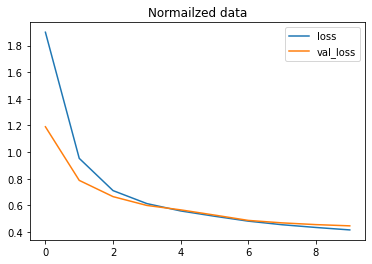

In [ ]:

import pandas as pd 
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history)[["loss", "val_loss"]].plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history)[["loss", "val_loss"]].plot(title="Normailzed data")

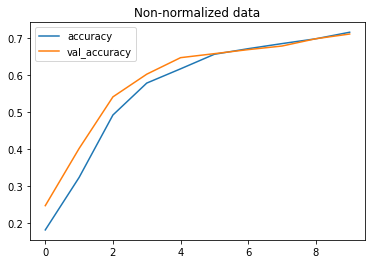

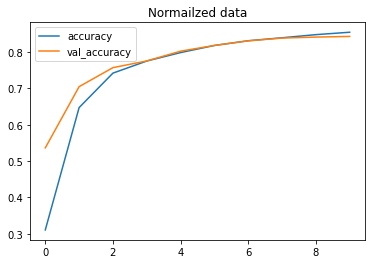

In [ ]:
import pandas as pd 
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history)[["accuracy", "val_accuracy"]].plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history)[["accuracy", "val_accuracy"]].plot(title="Normailzed data")

# Finding the ideal learning rate

In [ ]:
tf.random.set_seed(10)

model_fmnist_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax)
])


model_fmnist_norm.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)

lr = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=100)
norm_history = model_fmnist_norm.fit(x_train, y_train, epochs=100, batch_size=10000, validation_data=(x_test, y_test), callbacks=[es, lr]) #batch_size=32 by default

Epoch 1/100
6/6 [==============================] - 1s 148ms/step - loss: 2.3347 - accuracy: 0.1301 - val_loss: 2.2697 - val_accuracy: 0.1999 - lr: 1.0000e-04
Epoch 2/100
6/6 [==============================] - 1s 247ms/step - loss: 2.2245 - accuracy: 0.2494 - val_loss: 2.1647 - val_accuracy: 0.3044 - lr: 1.1220e-04
Epoch 3/100
6/6 [==============================] - 1s 128ms/step - loss: 2.1180 - accuracy: 0.3351 - val_loss: 2.0569 - val_accuracy: 0.3753 - lr: 1.2589e-04
Epoch 4/100
6/6 [==============================] - 1s 116ms/step - loss: 2.0047 - accuracy: 0.4151 - val_loss: 1.9342 - val_accuracy: 0.4685 - lr: 1.4125e-04
Epoch 5/100
6/6 [==============================] - 1s 117ms/step - loss: 1.8719 - accuracy: 0.5048 - val_loss: 1.7893 - val_accuracy: 0.5322 - lr: 1.5849e-04
Epoch 6/100
6/6 [==============================] - 1s 119ms/step - loss: 1.7175 - accuracy: 0.5482 - val_loss: 1.6279 - val_accuracy: 0.5613 - lr: 1.7783e-04
Epoch 7/100
6/6 [==============================] - 1

Text(0.5, 1.0, 'Finding the ideal learning rate')

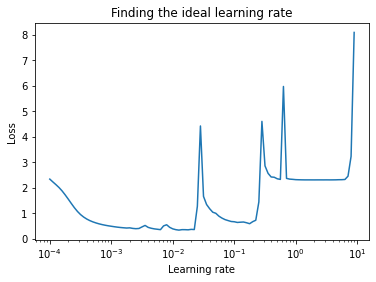

In [ ]:
import matplotlib.pyplot as plt
lrs = 1e-4 * 10**(tf.range(100, dtype=tf.float32)/20)
plt.semilogx(lrs, norm_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
tf.random.set_seed(10)

model_fmnist_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(100, "relu"),
    tf.keras.layers.Dense(len(class_names), activation=tf.keras.activations.softmax)
])


model_fmnist_norm.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ["accuracy"]
)


es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
norm_history = model_fmnist_norm.fit(x_train, y_train, epochs=100, batch_size=10000, validation_data=(x_test, y_test), callbacks=[es]) #batch_size=32 by default

Epoch 1/100
6/6 [==============================] - 1s 157ms/step - loss: 1.8995 - accuracy: 0.3108 - val_loss: 1.1905 - val_accuracy: 0.5364
Epoch 2/100
6/6 [==============================] - 1s 123ms/step - loss: 0.9535 - accuracy: 0.6471 - val_loss: 0.7883 - val_accuracy: 0.7046
Epoch 3/100
6/6 [==============================] - 1s 124ms/step - loss: 0.7115 - accuracy: 0.7418 - val_loss: 0.6664 - val_accuracy: 0.7569
Epoch 4/100
6/6 [==============================] - 1s 117ms/step - loss: 0.6142 - accuracy: 0.7750 - val_loss: 0.6003 - val_accuracy: 0.7753
Epoch 5/100
6/6 [==============================] - 1s 123ms/step - loss: 0.5590 - accuracy: 0.7983 - val_loss: 0.5671 - val_accuracy: 0.8022
Epoch 6/100
6/6 [==============================] - 1s 116ms/step - loss: 0.5193 - accuracy: 0.8178 - val_loss: 0.5280 - val_accuracy: 0.8179
Epoch 7/100
6/6 [==============================] - 1s 116ms/step - loss: 0.4824 - accuracy: 0.8309 - val_loss: 0.4880 - val_accuracy: 0.8305
Epoch 8/100
6

In [ ]:
model_fmnist_norm.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3710 - accuracy: 0.8759


[0.37101948261260986, 0.8758999705314636]

# Evaluating our multi-class classification model

To evlauate our multi-class classification model we could:

- Evalaute its performance using other classification metrics (such as a confusion matrix)
- Assess some of its predictions (through visualizations)

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=10):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float32")/cm.sum(axis=1)[:, np.newaxis]

  # Matshow based on cm
  fig, ax = plt.subplots(figsize=figsize) 
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(len(cm.shape[0]))

  # Label the axes
  ax.set(
      title="Confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(len(labels)),
      yticks=np.arange(len(labels)),
      xticklabels=labels,
      yticklabels=labels
  )

  # Set x-axis labels to bottom
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different font colors
  threshold = (cm.max() + cm.min())/2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f})%",
             horizontalalignment="center",
             color = "white" if cm[i,j]>threshold else "black",
             size=text_size)



313/313 [==============================] - 1s 2ms/step


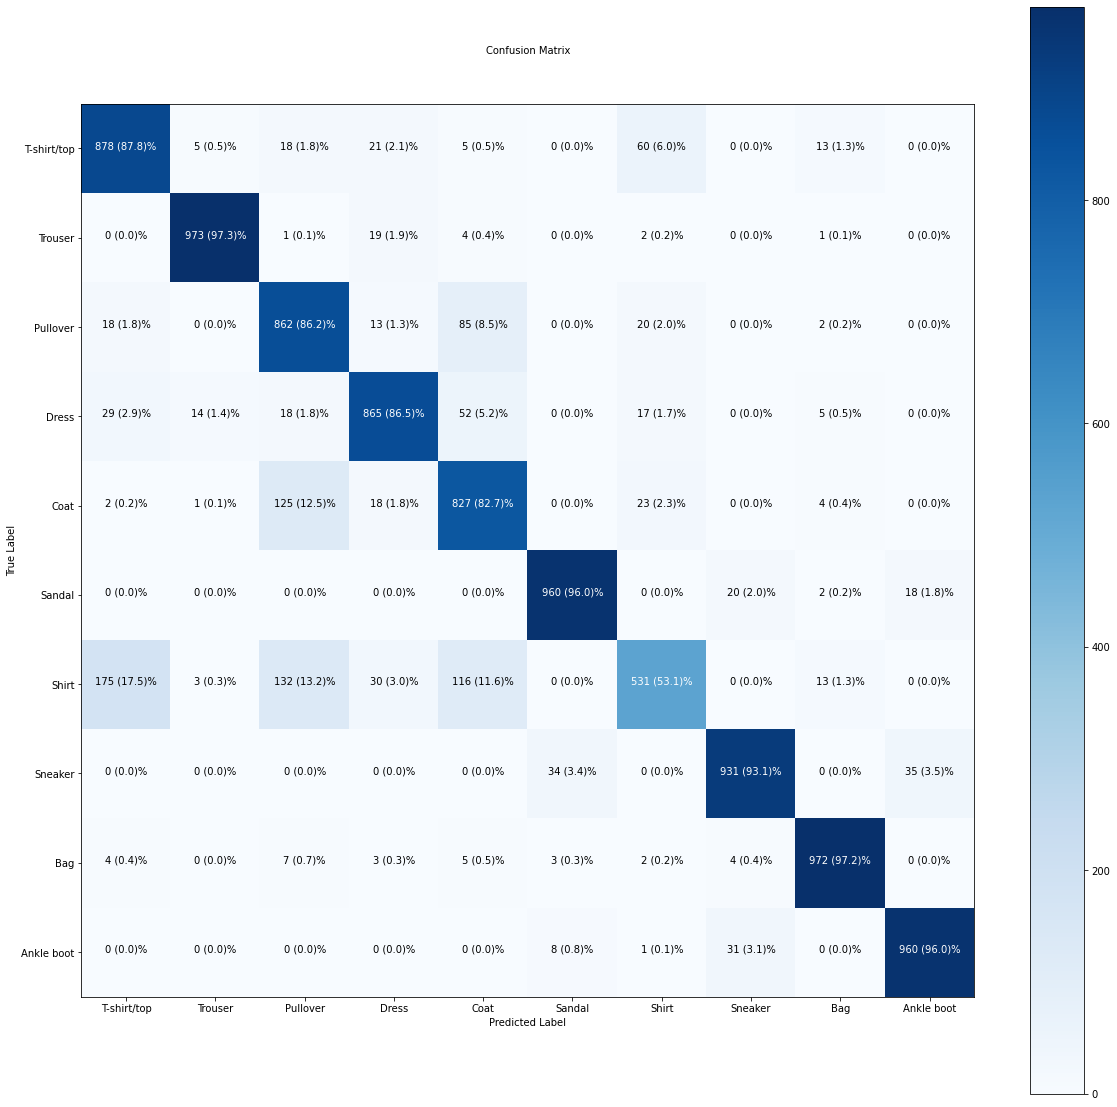

In [ ]:
y_pred = tf.argmax(model_fmnist_norm.predict(x_test),axis=1)
make_confusion_matrix(y_test, y_pred, class_names)


Plot a random image

- Make a prediction on said image
- Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
    i = random.randint(0, len(images))

    target_image = images[i]

    pred_probs = model.predict(target_image)
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label==true_label:
      color="green"
    else:
      color="red"

    plt.xlabel("Pred: {} confidence = {:.2f}% (True: {})".format(pred_label,
                                                      tf.reduce_max(pred_probs)*100,
                                                      true_label
                                 ),
               color=color)


1/1 [==============================] - 0s 20ms/step


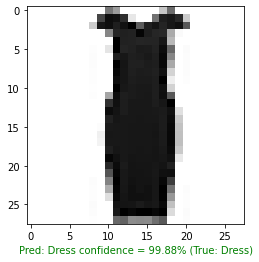

In [ ]:
plot_random_image(model_fmnist_norm, x_test, y_test, class_names)

## What patterns is our model learning?

In [ ]:
model_fmnist_norm.layers

In [ ]:
model_fmnist_norm.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 100)               78500     
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Extract a particular layer
model_fmnist_norm.layers[0]

In [ ]:

# Get the patterns of a layer in our network
weigths, biases = model_fmnist_norm.layers[1].get_weights()

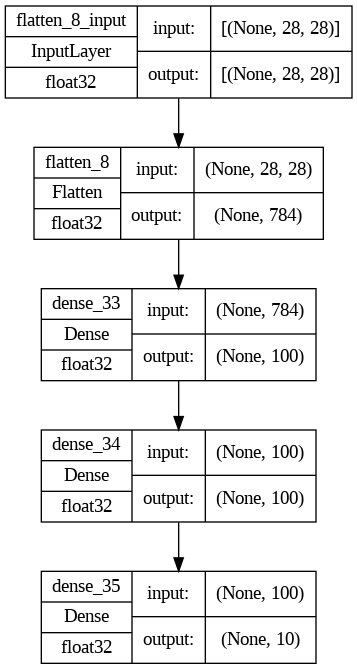

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_fmnist_norm, show_shapes=True, show_dtype=True)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 100)               78500     
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


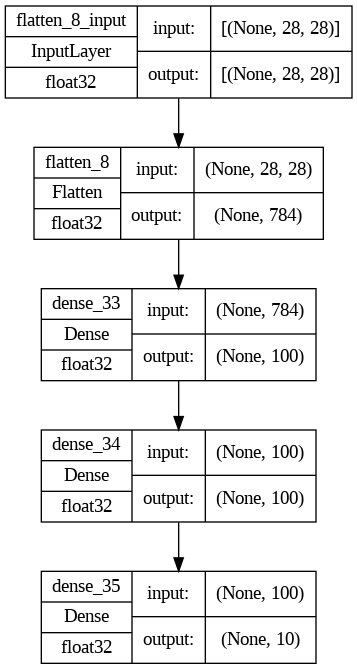

In [ ]:
# Inspect models
model_fmnist_norm.summary()

#Extract list of layers
model_fmnist_norm.layers

#Extract a particular layer
model_fmnist_norm.layers[0]

#Get the patterns of a layer in our network
weigths, biases = model_fmnist_norm.layers[1].get_weights()

#Plot model
from tensorflow.keras.utils import plot_model
plot_model(model_fmnist_norm, show_shapes=True, show_dtype=True)